<a href="https://colab.research.google.com/github/snghynn/ESAA-YB/blob/main/book___pg118_145_0331.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽가이드
ch2. 6
pg. 118~145

## 2-5. 데이터 전처리
> NaN, Null 값은 고정된 다른 값으로 변환해야 함

- 피처값 중 Null 값이 얼마 되지 않는다면 
  - 피처의 평균값 등으로 간단히 대체 가능

- 피처값 중Null 값이 대부분이라면
  - 해당 피처는 드롭하는 것이 좋음

> 사이킷런의 머신러닝 알고리즘은 문자열 값을 입력 값으로 허용X

- 모든 문자열 값은 인코딩돼서 숫자 형으로 변환해야 함
- 문자열 피처
  - categorical feature 
  - text feature -> 피처 벡터화의 기법으로 벡터화 or, 불필요한 피처라고 판단되면 삭제하는 것이 좋음



### 1) 데이터 인코딩

#### i. 레이블 인코딩(Label encoding)
- 카테고리 피처를 코드형 숫자 값으로 변환
- TV:1 / 냉장고:2 / 전자레인지:3 / 컴퓨터:4/ 선풍기:5 / 믹서:6 과 같이 숫자형으로 변환
- '01', '02'와 같은 코드값 역시 문자열이므로 1,2와 같은 숫자형 값으로 변환되어야 함 

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
items=['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder를 객체로 생성한 후 fit()과 transform()을 호출해 레이블 인코딩 수행
encoder=LabelEncoder() #LabelEncoder를 객체로 생성
encoder.fit(items)
labels=encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [ ]:
#문자열 값이 어떤 숫자 값으로 인코딩되었을까?
print('인코딩 클래스:', encoder.classes_) #classes_ : 0번부터 순서대로 변환된 인코딩 값에 대한 원본본

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [ ]:
# transform() 통해 인코딩된 값을 다시 디코딩 가능
print('디코딩 원본값:', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


<레이블 인코딩의 문제점>

- 일괄적인 숫자 값으로 변환이 되면서 예측 성능이 떨어지는 경우가 발생 
  - 숫자 값 때문에 큰 값에 가중치를 부여하거나 더 중요하게 인식할 가능성 발생

  -> 회귀와 같은 ML 알고리즘에는 적용하지 않아야 함
- 트리 계열의 ML 알고리즘은 숫자의 특성을 반영하지 않으므로 레이블 인코딩도 okay

#### ii. 원-핫 인코딩(One-Hot Encoding)
- 레이블 인코딩의 문제점을 해결하기 위한 방식
- 행 형태로 되어있는 피처의 고유 값을 열 형태로 차원 변환
- 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1/ 나머지 칼럼에는 0 

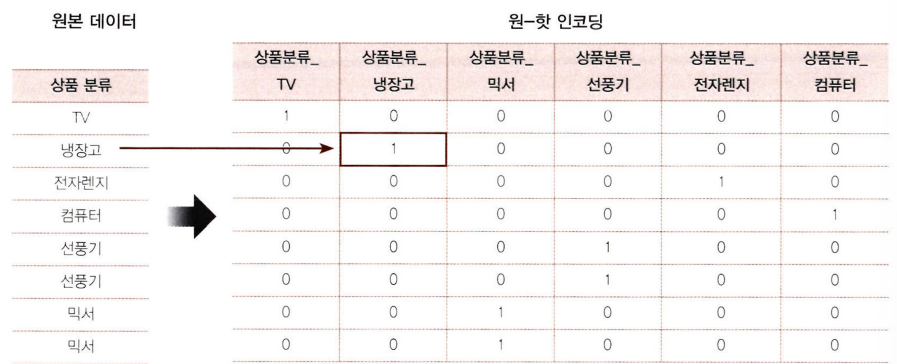

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [ ]:
items=['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

#우선 LabelEncoder 이용해 숫자 값으로 변환
encoder=LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)

#2차원 데이터로 변환
labels=labels.reshape(-1,1)

#원-핫 인코딩 적용
oh_encoder=OneHotEncoder()
oh_encoder.fit(labels)
oh_labels=oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [ ]:
#get_dummies(): 원-핫 인코딩을 더 쉽게. 숫자형 값으로 변환 없이도 바로 변환 가능
import pandas as pd
df=pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


#### i. 피처 스케일링과 정규화

<피처 스케일링(feature scaling)>
  - 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업

- 표준화
  - 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것
- 정규화
  - 서로 다른 feature의 크기를 통일하기 위해 크기를 변환해주는 개념(개별 데이터의 크기를 모두 똑같은 단위로 변경)

- 일반적인 표준화와 정규화를 피처 스케일링으로 통칭하고 선형대수 개념의 정규화를 벡터 정규화로 지칭 

<Standard Scaler>
- 표준화를 쉽게 지원하기 위한 클래스
- 개별 피처를 평균이 0, 분산이 1인 값으로 변환
- Support Vector Machine, Linear Regression, Logistic Regression은 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현됐기 때문에 사전에 표준화를 적용하는 것이 예측 성능 향상에 중요한 요소

In [ ]:
# StandardScaler가 어떻게 데이터 값을 변환할까?
from sklearn.datasets import load_iris
import pandas as pd

#붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환
iris=load_iris()
iris_data=iris.data
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var)

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
<bound method NDFrame._add_numeric_operations.<locals>.var of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2           

In [ ]:
#StandardScaler을 이용해 각 피처를 한번에 표준화하자
from sklearn.preprocessing import StandardScaler

#StandardScaler 객체 생성
scaler=StandardScaler()
#StandardSclaer로 데이터 세트 변환. fit()와 transform() 호출
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

#transform()시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환되어 이를 Dataframe으로 변환
iris_df_scaled=pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산 값')
print(iris_df_scaled.var())

feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


모든 칼럼 값의 평균이 0, 분산은 1에 가까운 값으로 변환됨.굿굿~

#### ii. MinMaxScaler
- 데이터 값을 0과 1사이의 범위 값으로 변환
- 데이터의 분포가 가우시안 분포가 아닐 경우에 Min, Max Scale 적용 가능

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler 객체 생성
scaler=MinMaxScaler()
#MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

#transform()시 스케일 변환된 데이터 세트가 NumPy ndaray로 변환돼 이를 DataFrame으로 변환
iris_df_scaled=pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


모든 피처에서 0~1 사이의 값으로 변환되는 스케일링이 적용됨

#### 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점 

- fit(): 데이터 변환을 위한 기준 정보 설정(데이터 세트의 최댓값/최솟값 설정)
- transform(): 설정된 정보를 이용해 데이터 변환
- fit_transfor(): fit()과 transform()을 한번에 적용

[fit(), transform() 시 주의사항]

- 학습 데이터로 fit()이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용해야 함



In [ ]:
### 테스트 데이터에 fit()을 적용할 때 발생하는 문제점

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0~10, 테스트 데이터는 0~5까지 값을 가지는 데이터 세트로 생성
# Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1)로 차원 변경
train_array=np.arange(0,11).reshape(-1,1)
test_array=np.arange(0,6).reshape(-1,1)

In [ ]:
### 학습 데이터 변경

# 최소값 0, 최대값 1로 변환하는 MinMaxScaler 객체 생성
scaler = MinMaxScaler()
# fit()하게 되면 train_array 데이터의 최소값이 0, 최대값이 10으로 설정.  
scaler.fit(train_array)
# 1/10 scale로 train_array 데이터 변환함. 원본 10-> 1로 변환됨.
train_scaled = scaler.transform(train_array)
 
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [ ]:
# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환
test_scaled=scaler.transform(test_array)

# test_array의 scale 변환 출력
print('원본 test_array의 데이터:', np.round(test_array.reshape(-1),2))
print('scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 test_array의 데이터: [0 1 2 3 4 5]
scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


출력 결과: 학습 데이터와 테스트 데이터의 스케일링이 맞지 않음 
- 머신러닝 모델은 학습 데이터를 기반으로 학습되기 때문에 반드시 테스트 데이터는 학습 데이터의 스케일링 기준에 따라야 함
- 테스트 데이터에 다시 fit()을 적용하면 안됨. 학습 데이터로 이미 fit()이 적용된 Scaler 객체를 이용해 transform()으로 변환해야 함 

In [ ]:
## 학습 데이터로 fit()을 수행한 MinMaxScaler 객체의 transform()을 이용해 데이터 변환
scaler=MinMaxScaler()
scaler.fit(train_array)
train_scaled=scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

#test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform()만으로 변환해야 함
test_scaled=scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))
# 모두 동일하게 변환됨! good~

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


- fit_transform()을 적용할 때도 마찬가지.
- fit_transform()은 fit()과 transform()을 순차적으로 수행하는 메소드이므로 테스트 데이터에서는 절대 사용x

[요약]
1. 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리
2. 1이 여의치 않다면 테스트 데이터 변환 시에는 fit()이나 fit_transform()을 적용하지 않고 학습 데이터로 이미 fit()된 Scaler 객체를 이용해 transform()으로 변환

## 2-6. 사이킷런으로 수행하는 타이타닉 생존자 예측

1) 데이터 파악 및 전처리 
- Passengerid : 탑승자 데이터 일련번호 
- survived : 생존여부 
 0=사망, 1=생존 
- Pclass : 선실 등급 
 1=일등석, 2=이등석, 3=삼등석 
- sex : 탑승자 성별 
- name : 탑승자 이름 
- Age : 탑승자 나이
- sibsp : 같이 탑승한 형제자매 또는 배우자 인원수 
- parch : 같이 탑승한 부모님 또는 어린이 인원수 
- ticket : 티켓 번호 
- fare : 요금 
- cabin : 선실 번호 
- embarked : 중간 정착 항구
 C=Cherbourg, Q=Queenstown, S=Southampton 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #시각화 패키지
import seaborn as sns
%matplotlib inline  

In [ ]:
titanic_df=pd.read_csv('train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null값 개수', titanic_df.isnull().sum().sum())

데이터 세트 Null값 개수 0


In [ ]:
print('Sex값 분포:\n', titanic_df['Sex'].value_counts())

Sex값 분포:
 male      577
female    314
Name: Sex, dtype: int64


In [ ]:
print('\n Cabin값 분포:\n', titanic_df['Cabin'].value_counts())


 Cabin값 분포:
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64


In [ ]:
print('\n Embarked값 분포:\n', titanic_df['Embarked'].value_counts())


 Embarked값 분포:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [ ]:
print(titanic_df['Cabin'].head(10))

0       N
1     C85
2       N
3    C123
4       N
5       N
6     E46
7       N
8       N
9       N
Name: Cabin, dtype: object


In [ ]:
titanic_df['Cabin']=titanic_df['Cabin'].str[:1] #Cabin의 좌석등급을 나타내는 문자열의 첫 글자만 가져오기기
print(titanic_df['Cabin'].head(10)) #전처리가 잘 이루어졌다.

0    N
1    C
2    N
3    C
4    N
5    N
6    E
7    N
8    N
9    N
Name: Cabin, dtype: object


2) 데이터 탐색 및 전처리 

i. 어떤 유형의 승객이 생존 확률이 높은지?

In [ ]:
## 성별이 생존 확률에 어떤 영향을 미쳤는지
# 성별에 따른 생존자 수 비교 
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

> 결과 
- Survived 0은 사망, 1은 생존
- 탑승객은 남자 577명, 여자 314명
- 여자 생존 74.2%, 남자 생존 18.8%

<Axes: xlabel='Sex', ylabel='Survived'>

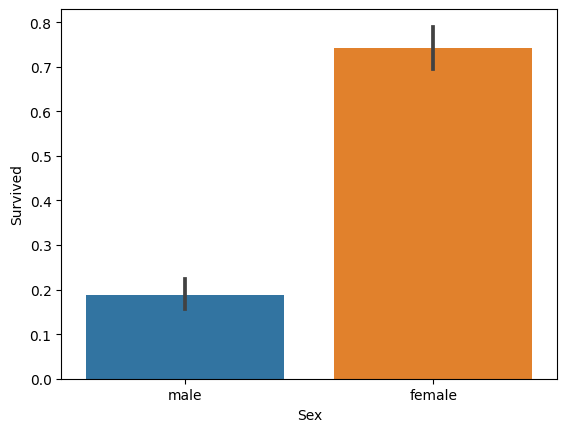

In [ ]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

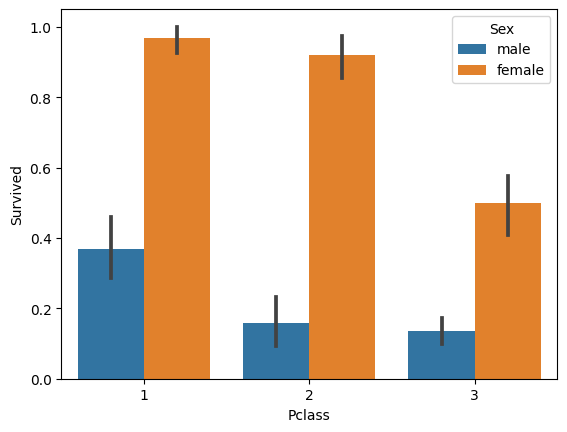

In [ ]:
## 부자와 가난한 사람 간의 생존 확률
#객실 등급과 성별에 따른 생존 확률
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

> 결과
- 여성
  - 일,이등실에 따른 생존 확률의 차이는 크지 않음
  - 삼등실의 생존 확률이 상대적으로 떨어짐 
- 남성
  - 일등실의 생존 확률이 이, 삼등실의 생존 확률보다 월등히 높음 

In [ ]:
## Age에 따른 생존 확률
# 범위별로 분류해 카테고리 값 할당

# 입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용
def get_category(age):
  cat=''
  if age<=-1: cat='Unknown'
  elif age<=5: cat='Baby'
  elif age<=12: cat='Child'
  elif age<=18: cat='Teenager'
  elif age<=25: cat='Student'
  elif age<=35: cat='Young Adult'
  elif age<=60: cat='Adult'
  else: cat='Elderly'

  return cat

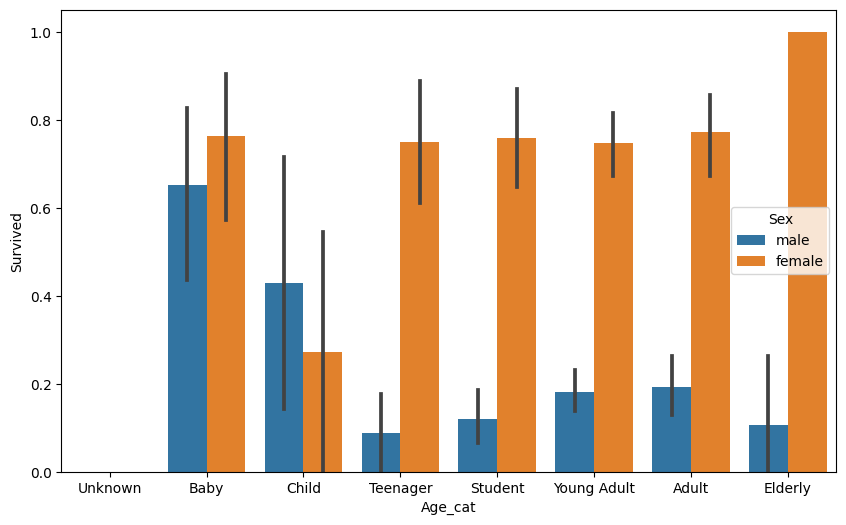

In [ ]:
# 막대그래프의 크기 figure를 크게 설정
plt.figure(figsize=(10,6))
#x축의 값을 순차적으로 표시하기 위한 설정
group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']
#lambda 식에 위에서 생성한 get_category()함수를 반환값으로 지정
#get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

> 결과
- 여자
  - Baby: 생존 확률이 높음
  - Child: 다른 연령대에 비해 생존률 낮음
  - Elderly: 생존률 매우 높음
- Sex, Age, Pclass가 중요하게 생존을 좌우하는 피처임임

3) 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환 
- LabelEncoder 객체는 카테고리 값의 유형 수에 따라 0~(카테고리 유형 수-1)까지의 숫자 값으로 변환함
- fit(), transform()으로 데이터 변환함 

In [ ]:
from sklearn import preprocessing

def encode_features(dataDF):
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le=preprocessing.LabelEncoder()
    le=le.fit(dataDF[feature])
    dataDF[feature]=le.transform(dataDF[feature])

  return dataDF

titanic_df=encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


> 결과
Sex, Cabin, Embarked 속성이 숫자형으로 바뀜 

4) transform_features(): 데이터의 전처리를 전체적으로 호출하는 함수 제작 
- Null 처리, 포매팅, 인코딩을 수행하는 내부 함수

In [ ]:
#Null 처리함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(),inplace=True)
  df['Cabin'].fillna('N',inplace=True)
  df['Embarked'].fillna('N',inplace=True)
  df['Fare'].fillna(0,inplace=True)
  return df

#머신러닝 알고리즘에 불필요한 속성제거
def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
  return df

#레이블 인코딩 수행
def format_features(df):
  df['Cabin']=df['Cabin'].str[:1]
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le=LabelEncoder()
    le=le.fit(df[feature])
    df[feature]=le.transform(df[feature])

  return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df=fillna(df)
  df=drop_features(df)
  df=format_features(df)
  return df

In [ ]:
#이 데이터세트에 transform_features()를 적용해 데이터가공
from sklearn.preprocessing import LabelEncoder
#원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df=pd.read_csv('train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived',axis=1)

X_titanic_df=transform_features(X_titanic_df)

5) train_test_split(): 별도의 테스트 데이터 세트 추출 

In [ ]:
# train_test_split() API 이용해 테스트데이터세트 추출
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=11)

6) 결정 트리, 랜덤 포레스트, 로지스틱 회귀 이용해 타이타닉 생존자 예측 


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# 결정트리, 랜덤포레스트, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf=DecisionTreeClassifier(random_state=11)
rf_clf=RandomForestClassifier(random_state=11)
lr_clf=LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가가
dt_clf.fit(X_train,y_train)
dt_pred=dt_clf.predict(X_test)
print('DecisionTreecClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test,dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train,y_train)
rf_pred=rf_clf.predict(X_test)
print('RandomForestClassifier 정확도{0:.4f}'.format(accuracy_score(y_test,rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(X_test)
print('LogisticRegression 정확도{0:.4f}'.format(accuracy_score(y_test,lr_pred)))
  

DecisionTreecClassifier 정확도:0.7877
RandomForestClassifier 정확도0.8547
LogisticRegression 정확도0.8492


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


> 결과
- 3개의 알고리즘 중 LogisticRegression이 가장 높은 정확도 

7-1) 교차 검증을 통한 결정 트리 모델 평가 

In [ ]:
from sklearn.model_selection import KFold

def exec_kfold(clf,folds=5):
  # 폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
  kfold=KFold(n_splits=folds)
  scores=[]

  # KFold 교차 검증 수행
  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
    # Classifier 학습, 예측, 정확도 계산
    clf.fit(X_train, y_train)
    predictions=clf.predict(X_test)
    accuracy=accuracy_score(y_test,predictions)
    scores.append(accuracy)
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

    # 5개 fold에서의 평균 정확도 계산.
    mean_score=np.mean(scores)
    print('평균 정확도: {0:.4f}'.format(mean_score))
# exec_kfold 호출
exec_kfold(dt_clf,folds=5)

교차 검증 0 정확도: 0.7542
평균 정확도: 0.7542
교차 검증 1 정확도: 0.7809
평균 정확도: 0.7675
교차 검증 2 정확도: 0.7865
평균 정확도: 0.7739
교차 검증 3 정확도: 0.7697
평균 정확도: 0.7728
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


7-2) 교차 검증을 cross_val_score() API 이용해 수행

In [ ]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(dt_clf,X_titanic_df,y_titanic_df,cv=5)
for iter_count,accuracy in enumerate(scores):
  print('교차 검증 {0} 정확도: {1:4f}'.format(iter_count,accuracy))


print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.743017
교차 검증 1 정확도: 0.775281
교차 검증 2 정확도: 0.792135
교차 검증 3 정확도: 0.786517
교차 검증 4 정확도: 0.842697
평균 정확도: 0.7879


> cross_val_score()과 K 폴드의 평균 정확도가 다름
- cross_val_score()가 StratifiedKFold를 이용해 폴드 세트를 분할하기 때문 

8) GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능 측정하기 

In [ ]:
# GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측성능 측정하기기
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[2,3,5,10],'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}

grid_dclf=GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy',cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf=grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions=best_dclf.predict(X_test)
accuracy=accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy))


GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8715


> 결과
- DecisionTreeClassifier를 학습시킨 뒤 예측 정확도가 87.15%로 향상됨
- 일반적으로 하이퍼 파라미터를 튜닝하더라도 이정도 수준으로 증가하기는 매우 어려움
- 테스트용 데이터 세트가 작기 때문에 수치상으로 예측 성능이 많이 증가한 것처럼 보임 